# 2.2.3 Model Selection: choosing estimators and their parameters

In [1]:
from sklearn import datasets, svm

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [4]:
svc = svm.SVC(C= 1, kernel='linear')
(svc.fit(X_digits[:-100], y_digits[:-100])
     .score(X_digits[-100:], y_digits[-100:]))

0.97999999999999998

## Split data into folds

In [24]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)

In [25]:
scores = list()

In [30]:
for k in range(3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)

    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)

    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
    

In [31]:
print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


## Cross-validation generators

In [32]:
from sklearn import cross_validation

/Users/bartev/.virtualenvs/skl/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### simple case

In [0]:
k_fold = cross_validation.KFold(n= 6, n_folds= 3)
for train_indices, test_indices in k_fold:
    print ('Train: %s | test: %s' % (train_indices, test_indices))

In [75]:
kfold = cross_validation.KFold(len(X_digits), n_folds= 3)

[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in kfold]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [76]:
cross_validation.cross_val_score(
    svc,
    X_digits, y_digits, cv= kfold, n_jobs = -1)
                                

array([ 0.93489149,  0.95659432,  0.93989983])

On the digits dataset, plot the cross-validation score of a SVC
estimator with an linear k#                           ernel as a function of parameter C 
# (use a logarithmic grid of points, from 1 to 10).

In [44]:
import numpy as np
from sklearn import cross_validation, datasets, svm

In [49]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel = 'linear')
C_s = np.logspace(-10, 0, 11)

In [51]:
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs = -1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

### do the plotting

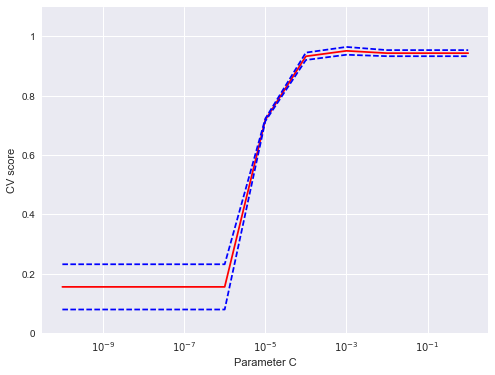

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1, figsize = (8, 6))
plt.clf()

plt.semilogx(C_s, scores, 'r')
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')

locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: '%g' % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

## Grid search and cross-validated estimators

In [79]:
from sklearn.grid_search import GridSearchCV

In [80]:
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator = svc, param_grid = dict(C = Cs), n_jobs= -1)

In [81]:
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [82]:
clf.best_score_

0.925

In [83]:
clf.best_estimator_.C

0.0077426368268112772

In [84]:
clf.score(X_digits[1000:], y_digits[1000:])

0.94353826850690092

## Nested cross-validation

In [85]:
cross_validation.cross_val_score(clf, X_digits, y_digits)

array([ 0.93853821,  0.96327212,  0.94463087])

### Cross validated estimators

In [86]:
from sklearn import linear_model, datasets


In [87]:
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()

In [88]:
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [89]:
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [90]:
lasso.alpha_

0.012291895087486173

### Exercise: 

On the diabetes dataset, find the optimal regularization parameter alpha. 
#### Bonus: 
How much can you trust the selection of alpha?

In [91]:
from sklearn import cross_validation, datasets, linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

In [92]:
alphas

array([  1.00000000e-04,   1.32035178e-04,   1.74332882e-04,
         2.30180731e-04,   3.03919538e-04,   4.01280703e-04,
         5.29831691e-04,   6.99564216e-04,   9.23670857e-04,
         1.21957046e-03,   1.61026203e-03,   2.12611233e-03,
         2.80721620e-03,   3.70651291e-03,   4.89390092e-03,
         6.46167079e-03,   8.53167852e-03,   1.12648169e-02,
         1.48735211e-02,   1.96382800e-02,   2.59294380e-02,
         3.42359796e-02,   4.52035366e-02,   5.96845700e-02,
         7.88046282e-02,   1.04049831e-01,   1.37382380e-01,
         1.81393069e-01,   2.39502662e-01,   3.16227766e-01])

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
scores = list()
scores_std = list()

In [96]:
for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs = -1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    

In [0]:
plt.figure(figsize = (6, 4))
plt.semilogx(alphas, scores, 'r')
# plot error lines showing +/- std.errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)), 'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)), 'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle= '--', color='0.5')
plt.show()

#############################################################################
 Bonus: how much can you trust the selection of alpha?
 To answer this question we use the LassoCV object that sets its alpha
 parameter automatically from the data by internal cross-validation (i.e. it
 performs cross-validation on the training data it receives).
 We use external cross-validation to see how much the automatically obtained
 alphas differ across different cross-validation folds.

In [105]:
lasso_cv = linear_model.LassoCV(alphas = alphas)
k_fold = cross_validation.KFold(len(X), 3)

Alpha parameters maximising the generalization score on different subsets of the data

In [107]:
for k, (train, test) in enumerate(k_fold):
    lasso_cv.fit(X[train], y[train])
    print('[fold {0}] alpha: {1:.5f}, score: {2:.5f}'.format(
        k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437


Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially